# Kernel density estimation and classification.

In the book they described a variety of uses for kernels. In our experience we use kernels as part of the convolution process to extract features from the input image. The size of the kernel is one of the parameters we always left fixed in a matrix of 3x3, since we thought the only use of it was to take little chunks of the image to analize (and we wanted a small computational load for our model). In this weeks work we explore further the uses of kernels, in a way that can potentially help us build a better model.

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

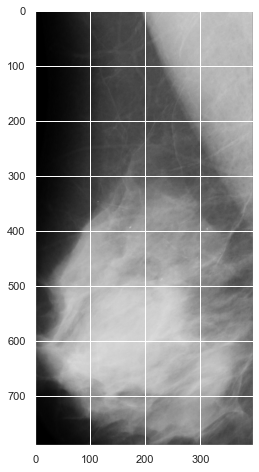

In [73]:
image = cv2.imread('mdb001.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)
plt.savefig('breast1.png')

In [43]:
kernel = np.ones((3, 3), np.float32) / 9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

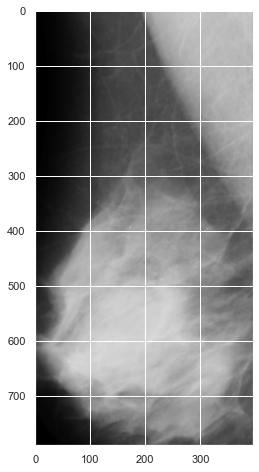

In [74]:
img = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1, figsize = (12, 8))
plt.imshow(img)
plt.savefig('breast-kernel1.png')

In [45]:
kernel_sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")


img_sharp = cv2.filter2D(image, -1, kernel_sharpen)
img_laplace = cv2.filter2D(image, -1, laplacian)
img_sox = cv2.filter2D(image, -1, sobelX)
img_soy = cv2.filter2D(image, -1, sobelY)


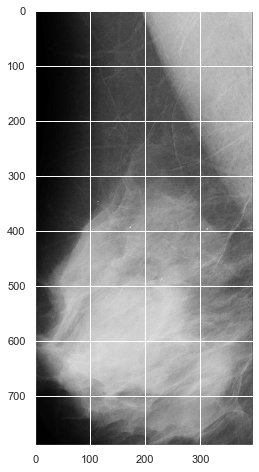

In [75]:
fig, ax = plt.subplots(1, figsize = (12, 8))
plt.imshow(img_sharp)
plt.savefig('img_sharp.png')

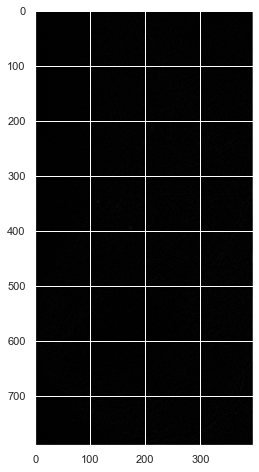

In [76]:
fig, ax = plt.subplots(1, figsize = (12, 8))
plt.imshow(img_laplace)
plt.savefig('img-laplace.png')

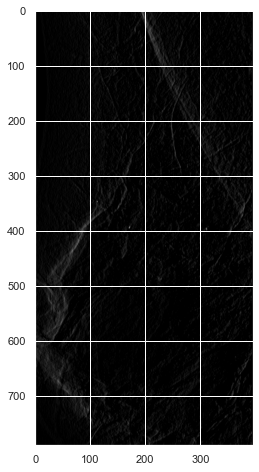

In [77]:

fig, ax = plt.subplots(1, figsize = (12, 8))
plt.imshow(img_sox)
plt.savefig('img-sox.png')

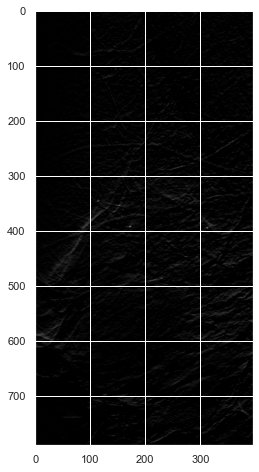

In [78]:

fig, ax = plt.subplots(1, figsize = (12, 8))
plt.imshow(img_soy)
plt.savefig('img-soy.png')

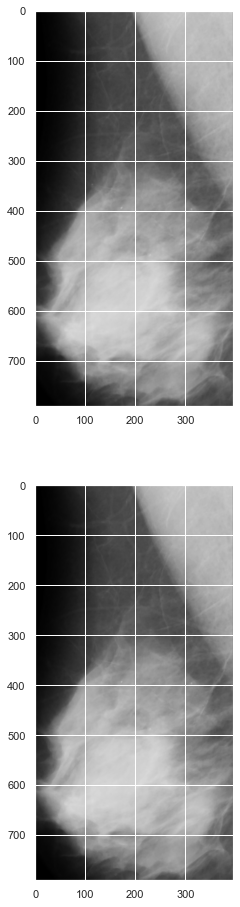

In [79]:
fig, ax = plt.subplots(1, figsize=(12,16))
ax = plt.subplot(211)
g = cv2.GaussianBlur(image, (3,3), 0)
plt.imshow(g)

ax = plt.subplot(212)
m = cv2.medianBlur(image, 3)
plt.imshow(m)

plt.savefig('gaussian-blur.png')

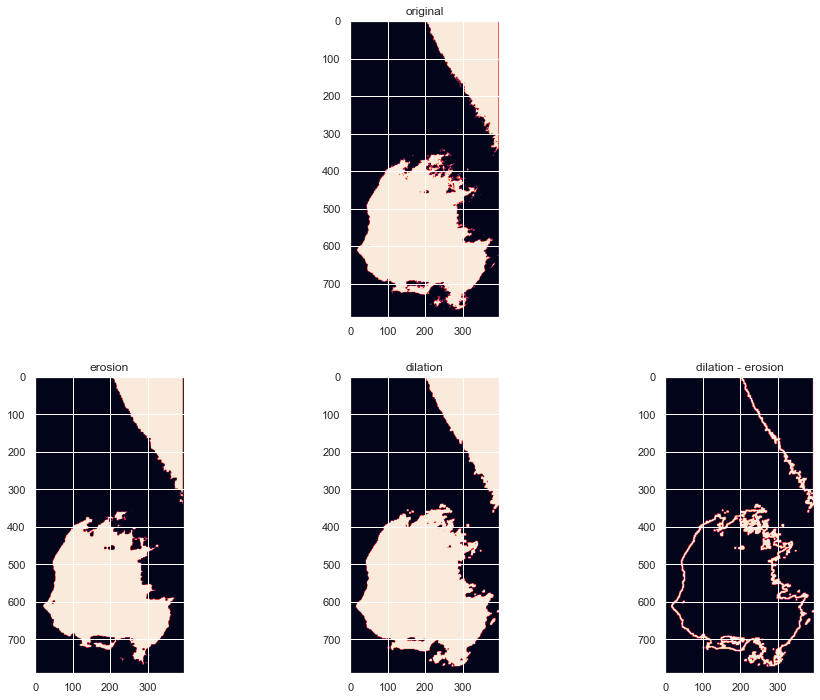

In [80]:
image = cv2.imread('mdb001.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
r ,image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
# create kernel
kernel = np.ones((5,5), np.uint8)
fig, ax = plt.subplots(1, figsize=(16,12))
# original
ax = plt.subplot(232)
plt.imshow(image)
plt.title('original')
# erosion
e = cv2.erode(image, kernel)
ax = plt.subplot(234)
plt.imshow(e)
plt.title('erosion')
# dilation
d = cv2.dilate(image, kernel)
ax = plt.subplot(235)
plt.imshow(d)
plt.title('dilation')
# morphological gradient (dilation - erosion)
m = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
ax = plt.subplot(236)
plt.imshow(m)
plt.title('dilation - erosion')\

plt.savefig('dilation-erosion.png')

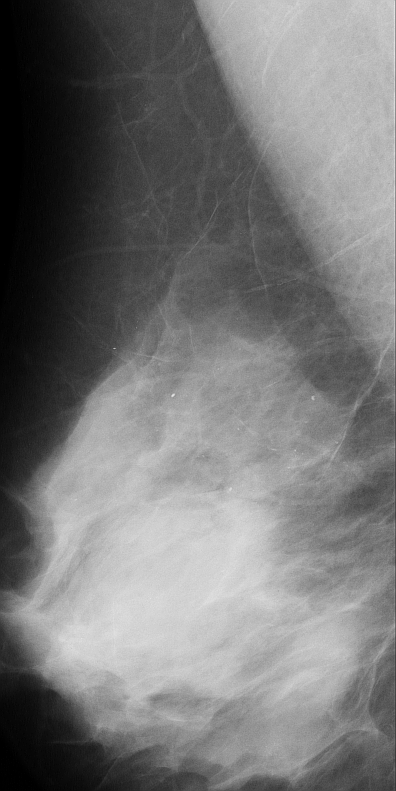

In [89]:
from PIL import Image, ImageFilter, ImageEnhance, ImageChops, ImageFont, ImageDraw
import numpy as np

image1 = Image.open('mdb001.png')
sharp = ImageEnhance.Sharpness(image1)
sharp = sharp.enhance(3.0)
sharp.save('sharp-pil.png')
sharp

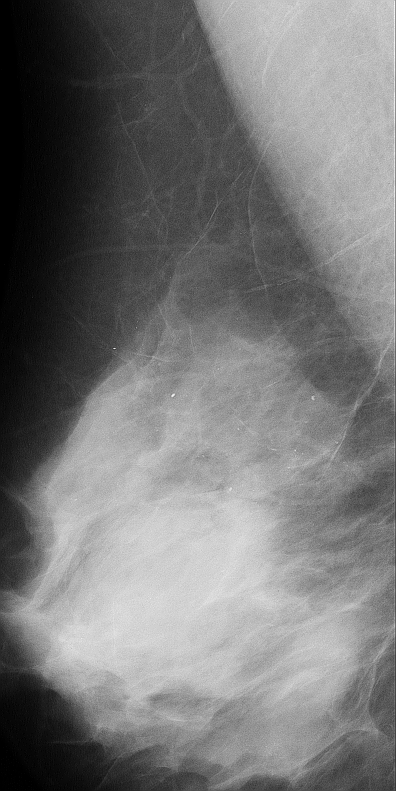

In [90]:
detail = sharp.filter(ImageFilter.DETAIL)
detail.save('detail-m1.png')
sharp.save('detail-pil.png')
detail

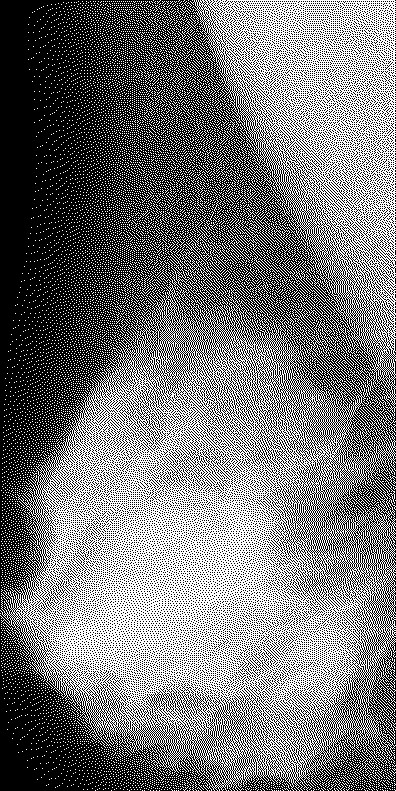

In [91]:
import ssl
import requests

new = detail.convert('1')
sharp.save('detail-points.png')
new

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import cv2

Some of the examples we have seen are using as an histogram to use kernels and help smooth some of the peaks that it presents. Here we are using images, so first we use one of our images as an example.

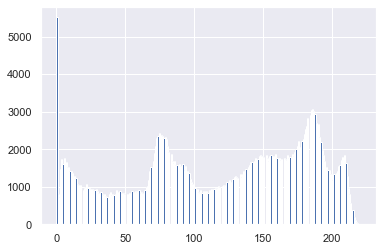

In [84]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('mdb001.png')
ax = plt.hist(image.ravel(), bins = 256)
plt.savefig('breast-ravel.png')
plt.show()


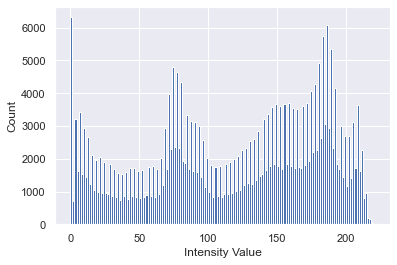

In [85]:
_ = plt.hist(image.ravel(), bins = 150 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.savefig('breast-bins150.png')
plt.show()


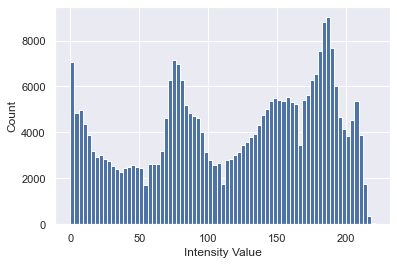

In [86]:
_ = plt.hist(image.ravel(), bins = 75 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.savefig('breast-bins75.png')
plt.show()

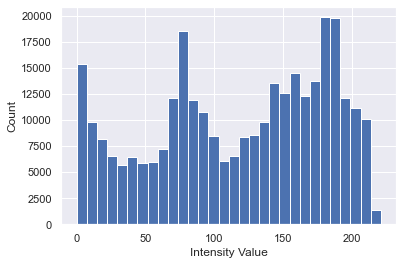

In [87]:
_ = plt.hist(image.ravel(), bins = 30 )
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.savefig('breast-bins30.png')
plt.show()

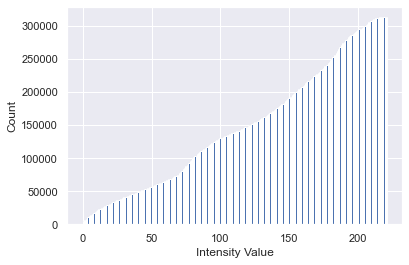

In [ ]:
_ = plt.hist(image.ravel(), bins = 256, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
plt.show()

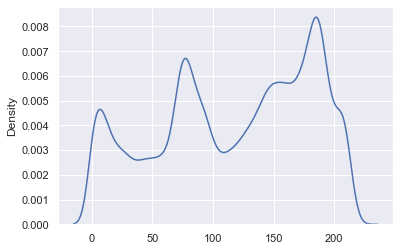

In [88]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

X = image.ravel()
sns.kdeplot(X)
plt.savefig('kdeplot-gaussian.png')

In [93]:
X=X.reshape(-1,1)
kde10 = KernelDensity(kernel='gaussian', bandwidth=1)
kde10.fit(X)
kde40 = KernelDensity(kernel='gaussian', bandwidth=10)
kde40.fit(X)
kde100 = KernelDensity(kernel='gaussian', bandwidth=100)
kde100.fit(X)


KernelDensity(bandwidth=100)

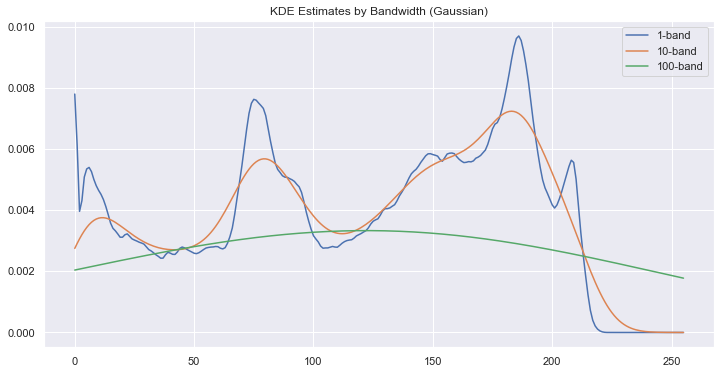

In [94]:
n2000 = np.array(list(range(0, 256)))[:, np.newaxis]

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10.score_samples(n2000)), label='1-band')
ax.plot(n2000, np.exp(kde40.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde100.score_samples(n2000)), label='100-band')
ax.legend()
ax.set_title("KDE Estimates by Bandwidth (Gaussian)")

plt.savefig('kdeplot-bandwith-estim.png')

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('data.csv')
dataset.drop(['Unnamed: 32', 'id'], inplace= True, axis = 1)
label_encoder = LabelEncoder()
#dataset.iloc[:,0] = label_encoder.fit_transform(dataset.iloc[:,0]).astype('float64')
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


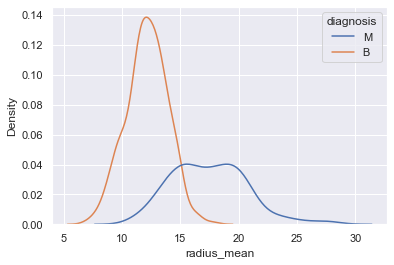

In [95]:
sns.kdeplot(data=dataset, x = 'radius_mean' , hue = 'diagnosis')
plt.savefig('kde-radius.png')

In [68]:
dataset.drop(['texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'radius_se', 'radius_worst'], inplace= True, axis = 1)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


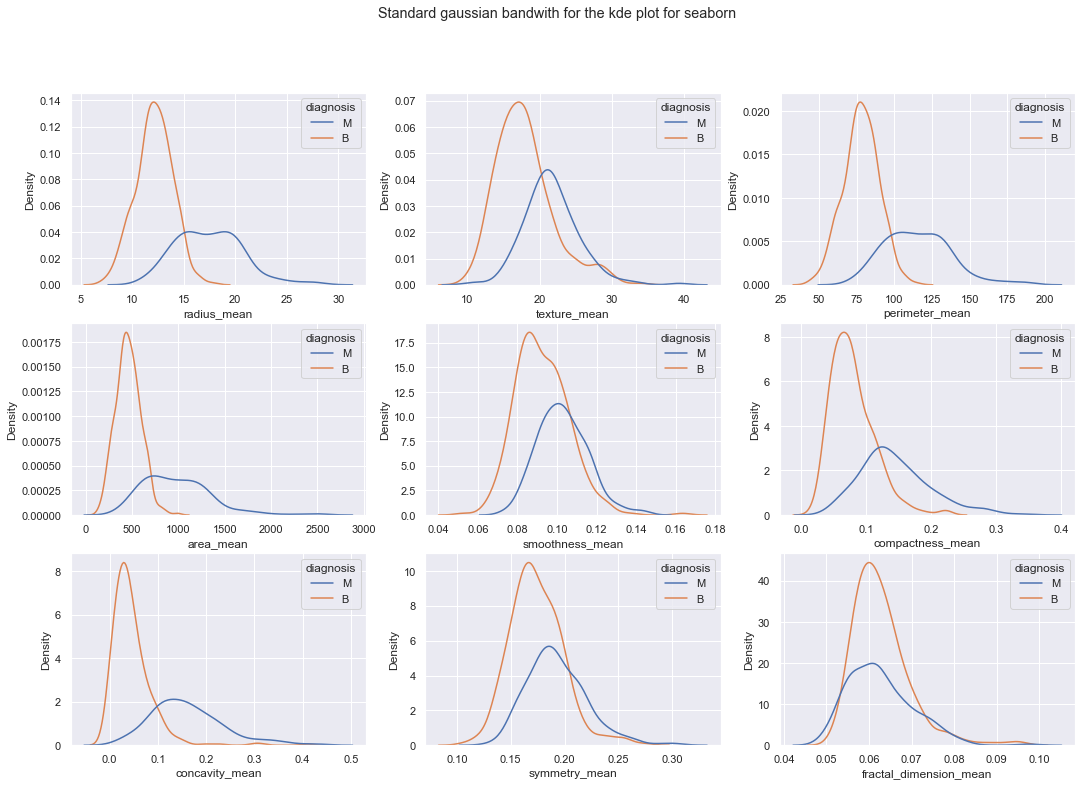

In [109]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
 
fig.suptitle('Standard gaussian bandwith for the kde plot for seaborn')
 
sns.kdeplot(ax=axes[0, 0], data=dataset, x='radius_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 1], data=dataset, x='texture_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 2], data=dataset, x='perimeter_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 0], data=dataset, x='area_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 1], data=dataset, x='smoothness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 2], data=dataset, x='compactness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 0], data=dataset, x='concavity_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 1], data=dataset, x='symmetry_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 2], data=dataset, x='fractal_dimension_mean', hue = 'diagnosis')

plt.savefig('bcw-normal-kde.png')


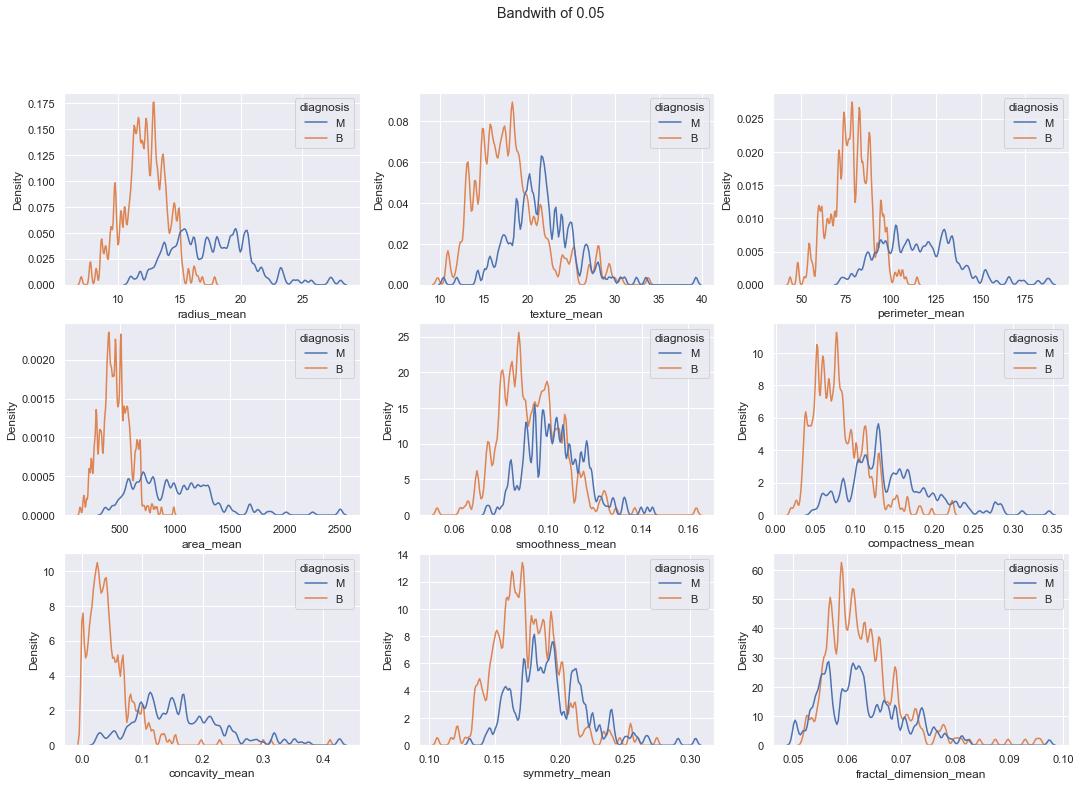

In [108]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
 
fig.suptitle('Bandwith of 0.05')
 
sns.kdeplot(ax=axes[0, 0], data=dataset, bw=0.05, x='radius_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 1], data=dataset,bw=0.05, x='texture_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 2], data=dataset,bw=0.05, x='perimeter_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 0], data=dataset,bw=0.05, x='area_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 1], data=dataset,bw=0.05, x='smoothness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 2], data=dataset,bw=0.05, x='compactness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 0], data=dataset,bw=0.05, x='concavity_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 1], data=dataset,bw=0.05, x='symmetry_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 2], data=dataset,bw=0.05, x='fractal_dimension_mean', hue = 'diagnosis')

plt.savefig('bcw-kde-0.05.png')


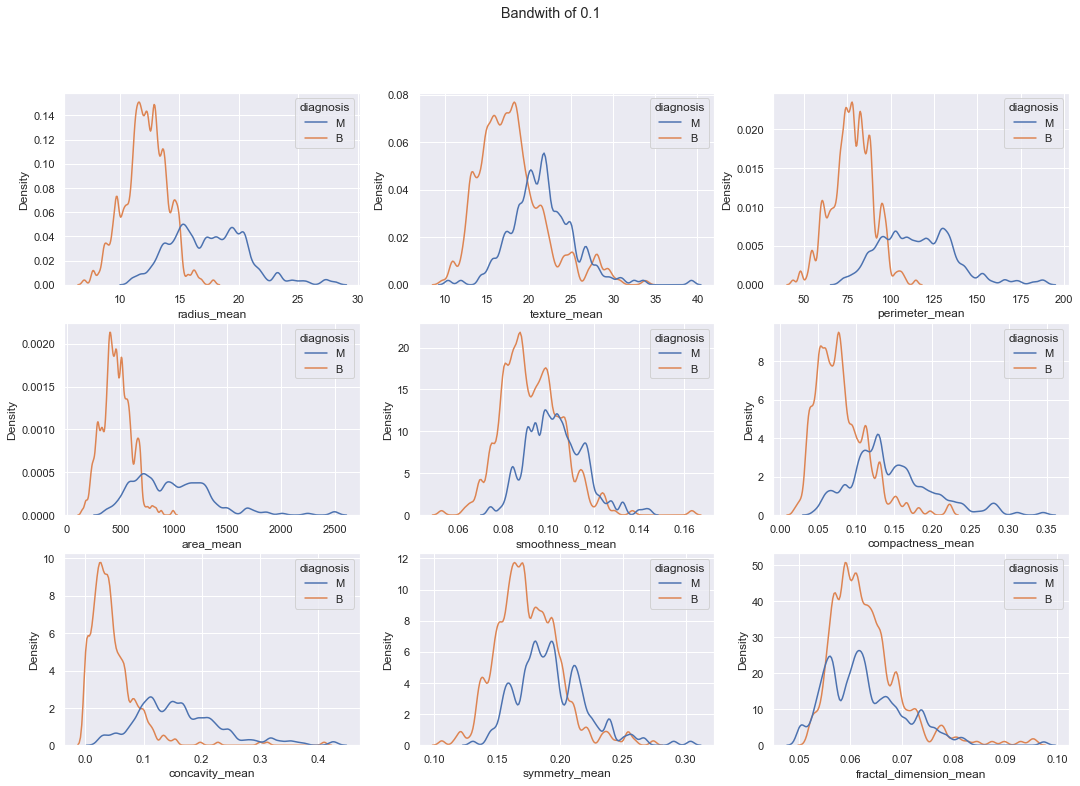

In [107]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
 
fig.suptitle('Bandwith of 0.1')
 
sns.kdeplot(ax=axes[0, 0], data=dataset, bw=0.1, x='radius_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 1], data=dataset,bw=0.1, x='texture_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[0, 2], data=dataset,bw=0.1, x='perimeter_mean', hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 0], data=dataset,bw=0.1, x='area_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 1], data=dataset,bw=0.1, x='smoothness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[1, 2], data=dataset,bw=0.1, x='compactness_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 0], data=dataset,bw=0.1, x='concavity_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 1], data=dataset,bw=0.1, x='symmetry_mean',  hue = 'diagnosis')
sns.kdeplot(ax=axes[2, 2], data=dataset,bw=0.1, x='fractal_dimension_mean', hue = 'diagnosis')

plt.savefig('bcw-kde-0.1.png')


In [114]:
from sklearn.model_selection import train_test_split 
target = 'diagnosis'


# División de los datos en train y test
# ==============================================================================


features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


X, y = dataset[features].values, dataset[target].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [115]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

In [119]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])})

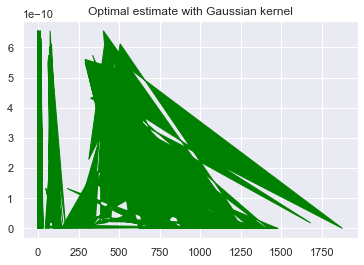

optimal bandwidth: 1.95


In [121]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.savefig('optimal-band.png')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))